In [56]:
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


%matplotlib inline  

# Section 1

In [64]:
df_raw = pd.read_csv('data_science_task.csv', index_col=0)

In [66]:
# print a heading of he table  - check to see that we have imported all columns
# difficult to check completeness as no record number was specified on the tutorial websiste
#df_raw.tail()
#df_raw.shape
df_raw.head()


,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
account_no,,,,,,,,,,
acc_00000316,F,18,12143,47000,60,1045,0.12,860,0,PAID_UP
acc_00000422,F,18,6021,13000,60,330,0.18,640,0,PAID_UP
acc_00001373,F,39,12832,13000,60,296,0.13,820,0,PAID_UP
acc_00001686,F,33,4867,5000,36,191,0.22,540,0,PAID_UP
acc_00001733,F,23,5107,22000,36,818,0.20,580,11314,LIVE


In [67]:
# check out the status field
df_raw.status.unique()

array(['PAID_UP', 'LIVE', 'DEFAULT'], dtype=object)

In [68]:
# some descriptive stats
df_raw.describe()

,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance
count,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000
mean,33.429655,12711.212702,29262.793799,46.776796,906.091099,0.150078,749.478246,2216.135523
std,9.446930,6054.076749,19022.600570,14.690745,727.649879,0.049614,143.739961,6518.494486
min,18.000000,1507.000000,2000.000000,12.000000,83.000000,-0.040000,500.000000,0.000000
25%,26.000000,7981.000000,15000.000000,36.000000,452.000000,0.120000,630.000000,0.000000
50%,33.000000,11436.000000,24000.000000,48.000000,721.000000,0.150000,750.000000,0.000000
75%,40.000000,16407.500000,39000.000000,60.000000,1136.000000,0.180000,880.000000,0.000000
max,65.000000,49698.000000,116000.000000,72.000000,8430.000000,0.350000,1000.000000,99000.000000


# Section 2

In [69]:
# take only numerical columns for plotting purpose
df_numerical = df_raw.select_dtypes(exclude=['object'])

age
income
loan_amount
term
installment_amount
interest_rate
credit_score_at_application
outstanding_balance


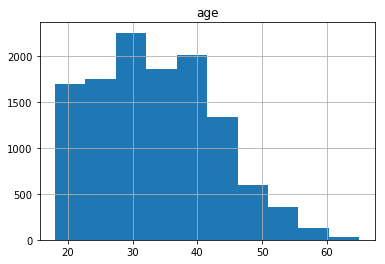

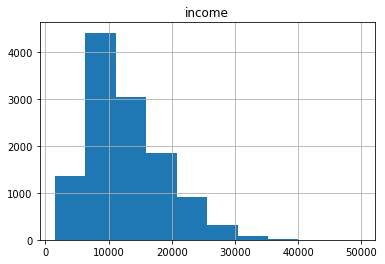

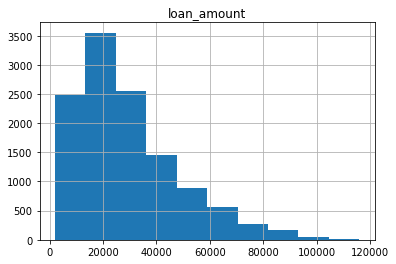

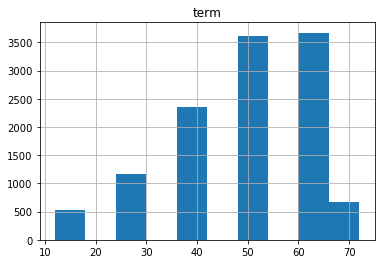

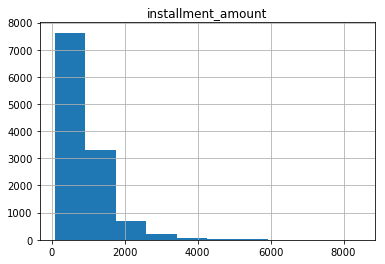

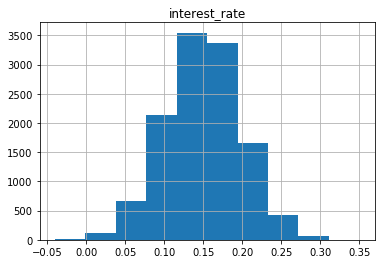

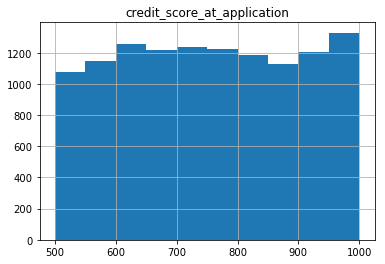

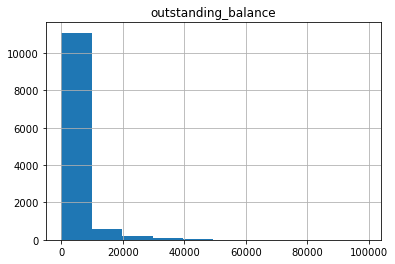

In [70]:
for columns in df_numerical:
    print(columns)
    pd.DataFrame.hist(df_numerical, column=columns)

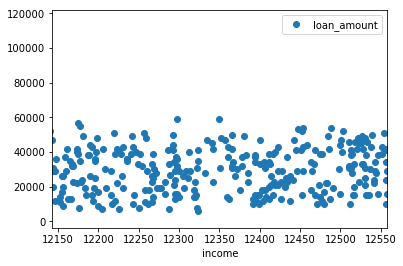

In [71]:
# compare income and loan amount
df_numerical.plot(x='income', y='loan_amount', style='o')

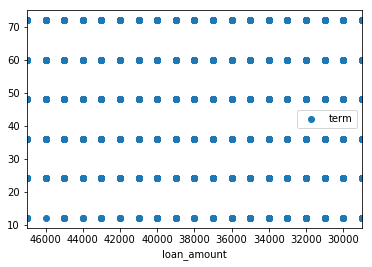

In [72]:
# compare term and loan amount
df_numerical.plot(x='loan_amount', y='term', style='o')

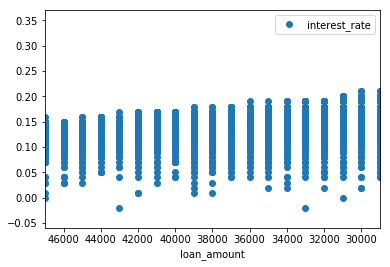

In [73]:
# compare interest rate and loan amount
df_numerical.plot(x='loan_amount', y='interest_rate', style='o')

# Section 3

## 3.1 First encode the data using the get Dummies variable

In [74]:
df_raw.gender =  LabelEncoder().fit_transform(df_raw.gender)
#female = 0
#male = 1

df_raw.status = LabelEncoder().fit_transform(df_raw.status)
#paid_up= 2
#live = 1
#default = 0

In [77]:
df_encoded = pd.get_dummies(df_raw)


## 3.2 Split the data into two sections

In [79]:
df_current = df_encoded[df_encoded.status == 1]

In [80]:
print(df_current.head())
print(df_current.shape)

              gender  age  income  loan_amount  term  installment_amount  \
account_no                                                                 
acc_00001733       0   23    5107        22000    36                 818   
acc_00038217       0   40   15659        33000    48                 853   
acc_00039355       1   25   15660        15000    48                 395   
acc_00041999       0   30    4208        15000    48                 481   
acc_00043452       0   18    6535        12000    48                 346   

              interest_rate  credit_score_at_application  outstanding_balance  \
account_no                                                                      
acc_00001733           0.20                          580                11314   
acc_00038217           0.11                          880                 5637   
acc_00039355           0.12                          860                 6039   
acc_00041999           0.23                          530      

In [81]:
df_hist = df_encoded[df_encoded.status != 1]

In [82]:
print(df_hist.head())
print(df_hist.shape)

              gender  age  income  loan_amount  term  installment_amount  \
account_no                                                                 
acc_00000316       0   18   12143        47000    60                1045   
acc_00000422       0   18    6021        13000    60                 330   
acc_00001373       0   39   12832        13000    60                 296   
acc_00001686       0   33    4867         5000    36                 191   
acc_00002114       1   38    9328        25000    36                 904   

              interest_rate  credit_score_at_application  outstanding_balance  \
account_no                                                                      
acc_00000316           0.12                          860                    0   
acc_00000422           0.18                          640                    0   
acc_00001373           0.13                          820                    0   
acc_00001686           0.22                          540      

# 3.3 Create a train and test dataset

One can scale the data prior to fitting the model; however logistic models will transform the data and scale it naturally.
So we can skip this step for now.

In [85]:
df_hist.head()

,gender,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,status
account_no,,,,,,,,,,
acc_00000316,0,18,12143,47000,60,1045,0.12,860,0,2
acc_00000422,0,18,6021,13000,60,330,0.18,640,0,2
acc_00001373,0,39,12832,13000,60,296,0.13,820,0,2
acc_00001686,0,33,4867,5000,36,191,0.22,540,0,2
acc_00002114,1,38,9328,25000,36,904,0.18,630,0,2


In [88]:
#split the outcome and input variables
X = df_hist.iloc[:, :-1]
y = df_hist.iloc[:, -1]


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=201707)

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7997, 9)
(7997,)
(2000, 9)
(2000,)


# 3.4 Fit the model and check the accuracy of the fit

In [99]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X_train, y_train)


# check the accuracy on the training set
scores = model.score(X_train, y_train)
y_pred = model.predict(X_test)

In [95]:
#logistic AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
logit_roc_auc = metrics.roc_auc_score(y_test, y_pred)


#print(metrics.auc(fpr, tpr))
print("Logistic AUC = %2.6f" % logit_roc_auc)
print(metrics.classification_report(y_test,y_pred ))


print("Accuracy :" + str(scores.mean()))
#print("Std Dev: " + str(scores.std()))

print("Logistic accuracy is %2.6f" % accuracy_score(y_test,model.predict(X_test)))


ValueError: Data is not binary and pos_label is not specified

# 4. Evaluate your model

In [96]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X_train, y_train, scoring='accuracy', cv=10)

In [97]:
print("Accuracy :" + str(scores.mean()))
print("Std Dev: " + str(scores.std()))

Accuracy :1.0
Std Dev: 0.0


# 5. Predict with Model

In [36]:
# dimensions of the open book....
df_current.shape

(2001, 13)

In [37]:
predicted = model.predict(df_current[['age','income', 'loan_amount','term','installment_amount','interest_rate','credit_score_at_application','gender_F','gender_M','status_DEFAULT','status_PAID_UP']])

In [38]:
df_predicted = pd.DataFrame(predicted, columns=['Predicted'],index=df_current.index )

In [39]:
df_forecast = pd.concat([df_current, df_predicted], axis=1)

In [40]:
df_forecast

,age,income,loan_amount,term,installment_amount,interest_rate,credit_score_at_application,outstanding_balance,gender_F,gender_M,status_DEFAULT,status_LIVE,status_PAID_UP,Predicted
account_no,,,,,,,,,,,,,,
acc_00001733,23,5107,22000,36,818,0.20,580,11314,1,0,0,1,0,0
acc_00038217,40,15659,33000,48,853,0.11,880,5637,1,0,0,1,0,0
acc_00039355,25,15660,15000,48,395,0.12,860,6039,0,1,0,1,0,0
acc_00041999,30,4208,15000,48,481,0.23,530,2817,1,0,0,1,0,0
acc_00043452,18,6535,12000,48,346,0.17,660,3120,1,0,0,1,0,0
acc_00046346,43,20508,47000,24,2126,0.08,960,12607,1,0,0,1,0,0
acc_00065653,53,11193,7000,36,246,0.16,730,1087,1,0,0,1,0,0
acc_00066883,23,11632,23000,36,797,0.15,760,6849,0,1,0,1,0,0
acc_00069620,39,23332,32000,48,796,0.09,930,11992,0,1,0,1,0,0


In [ ]:
expected repayment amount for each loan: this is just one minus the predicted probability of default multiplied by the outstanding_amount
Sum all the expected repayment amounts to find the total expected value of the book.
expected value to the sum of the outstanding_amount and comparing it to the proportion number of “PAID_UP” to the number of “DEFAULT” 

In [ ]:
(1-df_forecast.Predicted)*df_forecast.outstanding_balance

In [100]:
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, y_pred)
print("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, y_pred))



---Logistic Model---


ValueError: Data is not binary and pos_label is not specified

In [53]:
# Plot of a ROC curve for a specific class
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

AttributeError: module 'matplotlib' has no attribute 'plot'